# 1 Load and Inspect the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load the dataset
file_path = '/content/Steel_industry_data.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [5]:
data.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


# 2 Data Preprocessing

In [6]:
# Convert date columns to datetime objects
data['date'] = data['date'].astype(str)
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')

print(data['date'].head())

0   2018-01-01 00:15:00
1   2018-01-01 00:30:00
2   2018-01-01 00:45:00
3   2018-01-01 01:00:00
4   2018-01-01 01:15:00
Name: date, dtype: datetime64[ns]


In [7]:
# Convert 'WeekStatus' and 'Day_of_week' to categorical data types
data['WeekStatus'] = data['WeekStatus'].astype('category')
data['Day_of_week'] = data['Day_of_week'].astype('category')
data['Load_Type'] = data['Load_Type'].astype('category')

In [8]:
# Check for missing values
print(data.isnull().sum())

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35040 non-null  datetime64[ns]
 1   Usage_kWh                             35040 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64       
 4   CO2(tCO2)                             35040 non-null  float64       
 5   Lagging_Current_Power_Factor          35040 non-null  float64       
 6   Leading_Current_Power_Factor          35040 non-null  float64       
 7   NSM                                   35040 non-null  int64         
 8   WeekStatus                            35040 non-null  category      
 9   Day_of_week                           35040 non-null  category      
 10

# 3 Exploratory Data Analysis (EDA)

## 3.1 Univariate Analysis
Distribution plots for continuous variables

In [10]:
continuous_vars = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor']

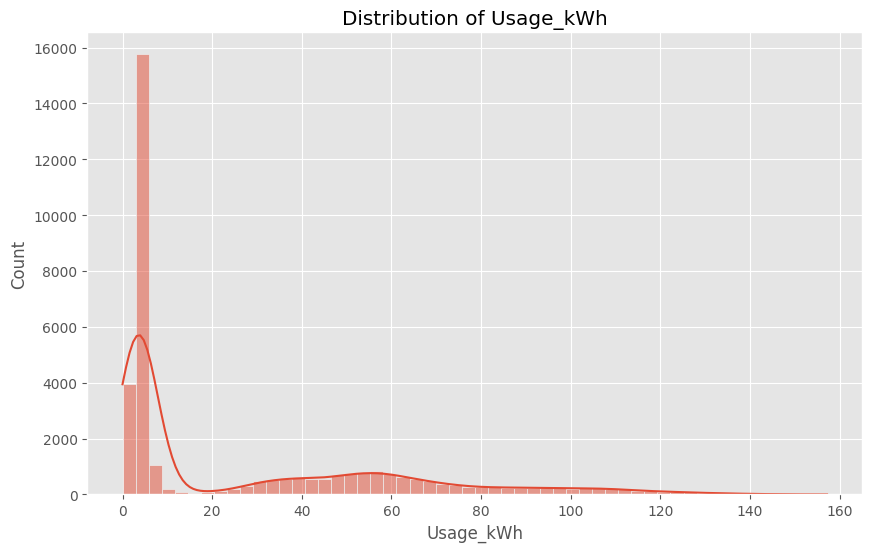


--------------------------------------------------------------------------------------------------------------------



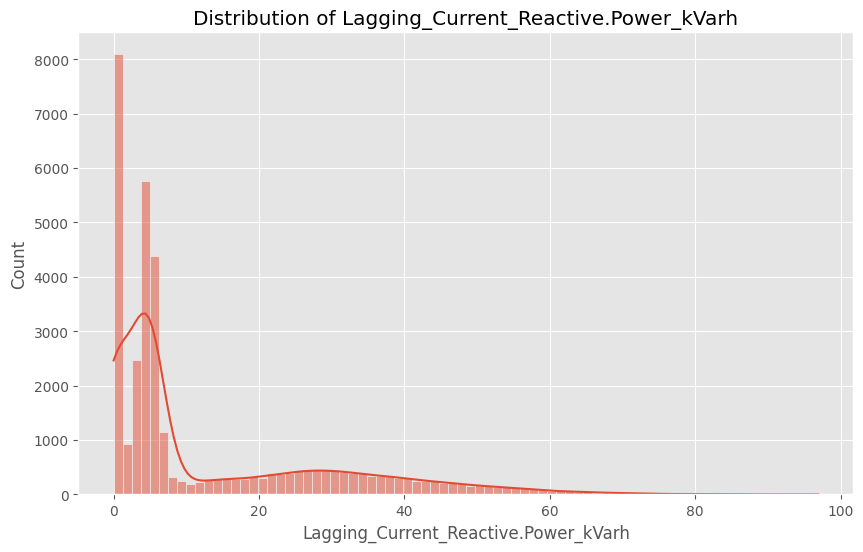


--------------------------------------------------------------------------------------------------------------------



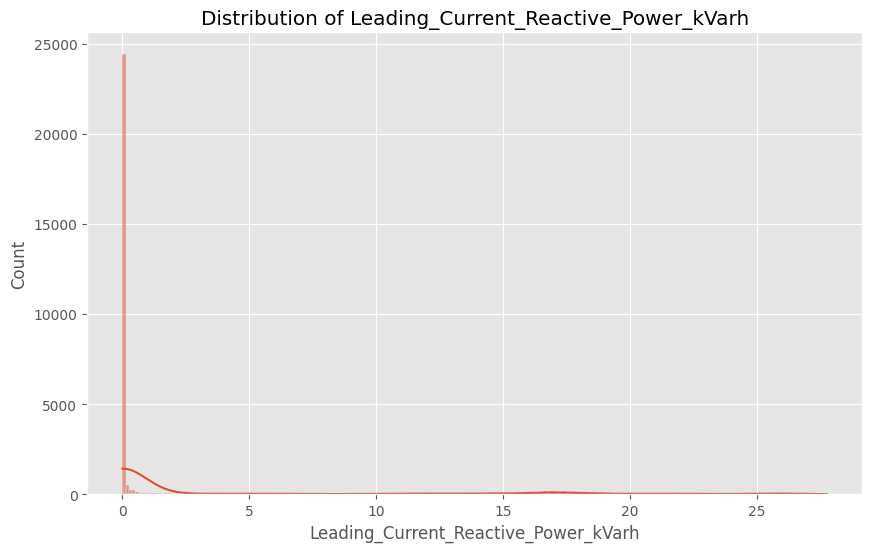


--------------------------------------------------------------------------------------------------------------------



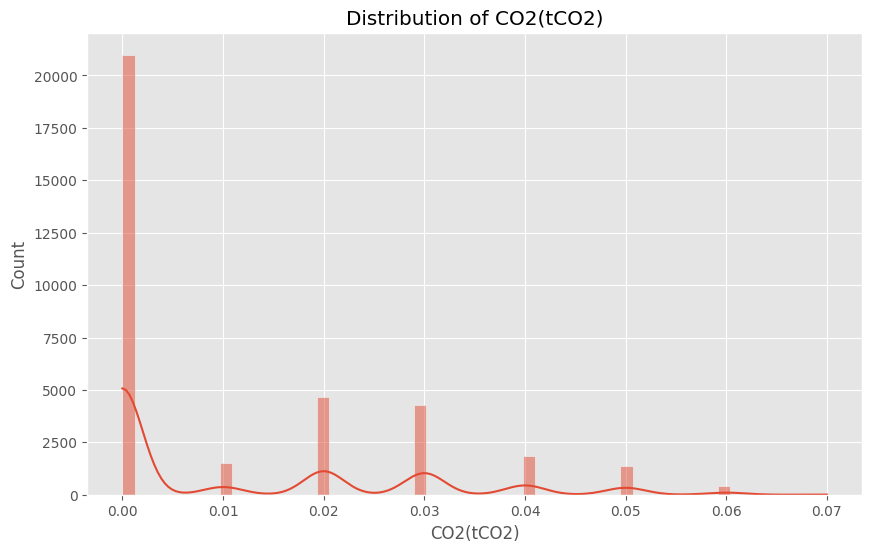


--------------------------------------------------------------------------------------------------------------------



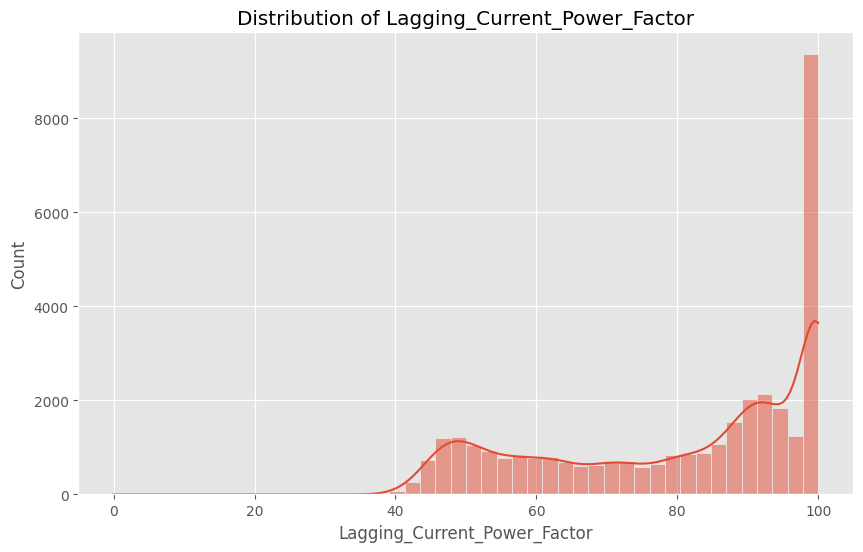


--------------------------------------------------------------------------------------------------------------------



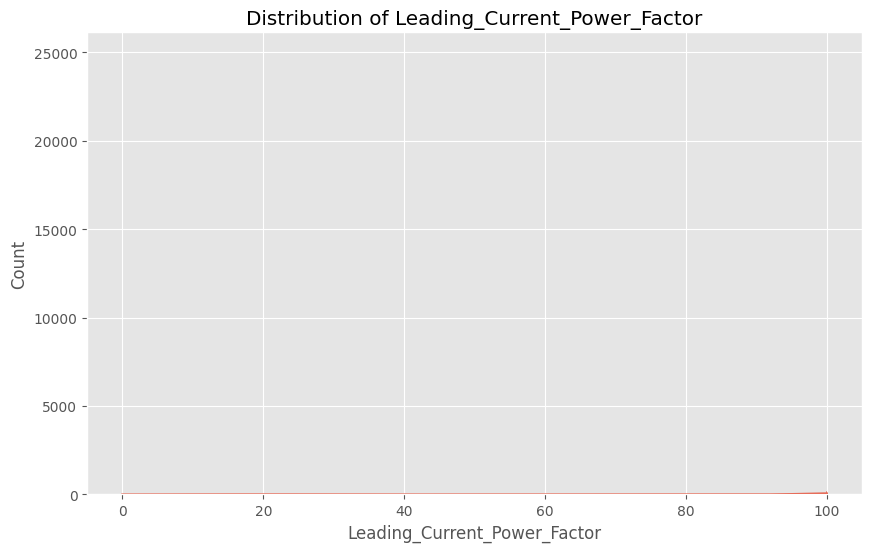


--------------------------------------------------------------------------------------------------------------------



In [11]:
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()
    print('\n--------------------------------------------------------------------------------------------------------------------\n')

## 3.2 Bivariate Analysis
Relationship between continuous variables and Load type

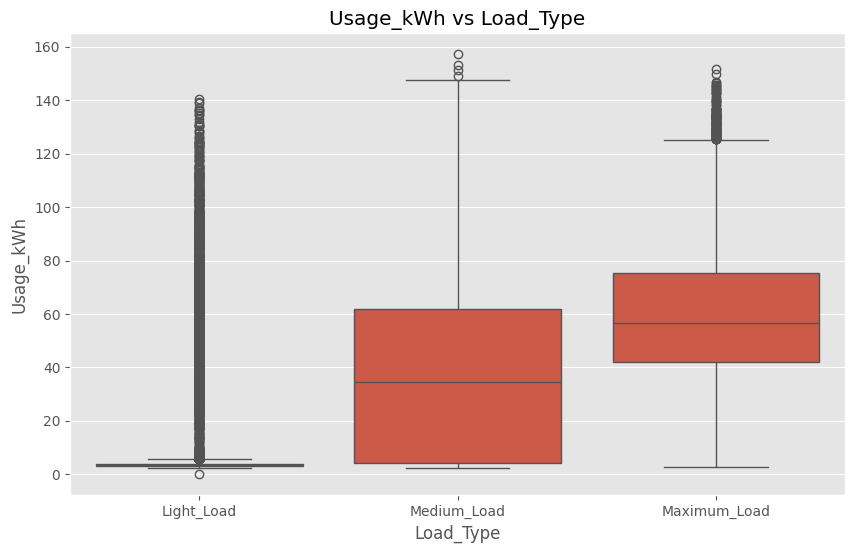


--------------------------------------------------------------------------------------------------------------------



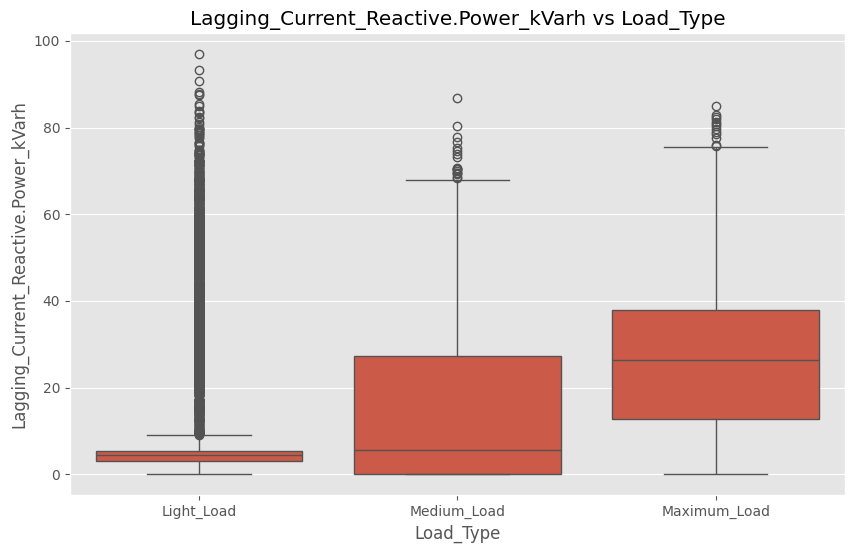


--------------------------------------------------------------------------------------------------------------------



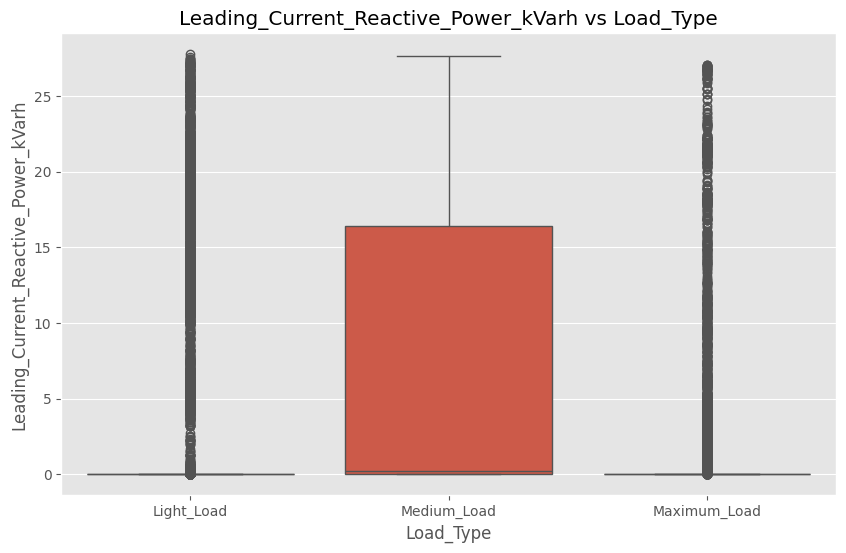


--------------------------------------------------------------------------------------------------------------------



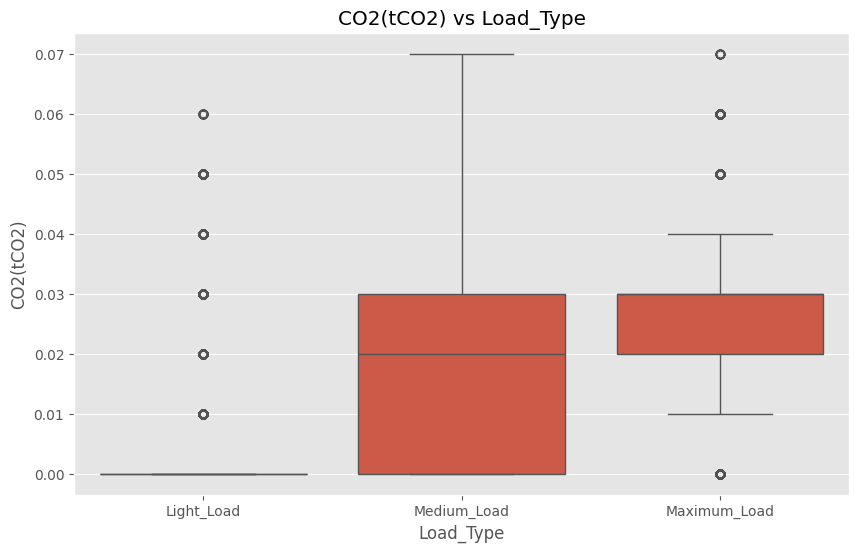


--------------------------------------------------------------------------------------------------------------------



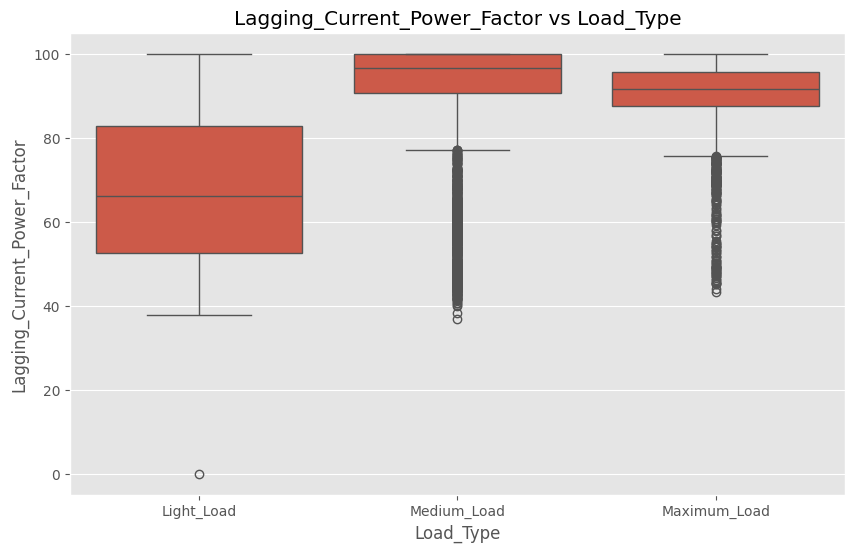


--------------------------------------------------------------------------------------------------------------------



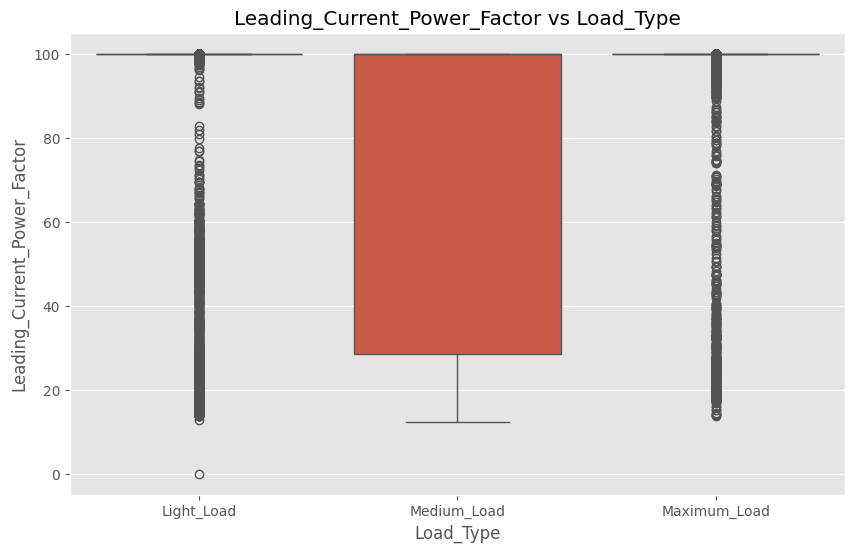


--------------------------------------------------------------------------------------------------------------------



In [12]:
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Load_Type', y=var, data=data, order=['Light_Load', 'Medium_Load', 'Maximum_Load'])
    plt.title(f'{var} vs Load_Type')
    plt.show()
    print('\n--------------------------------------------------------------------------------------------------------------------\n')

## 3.3 Time Series Analysis
Trends over time

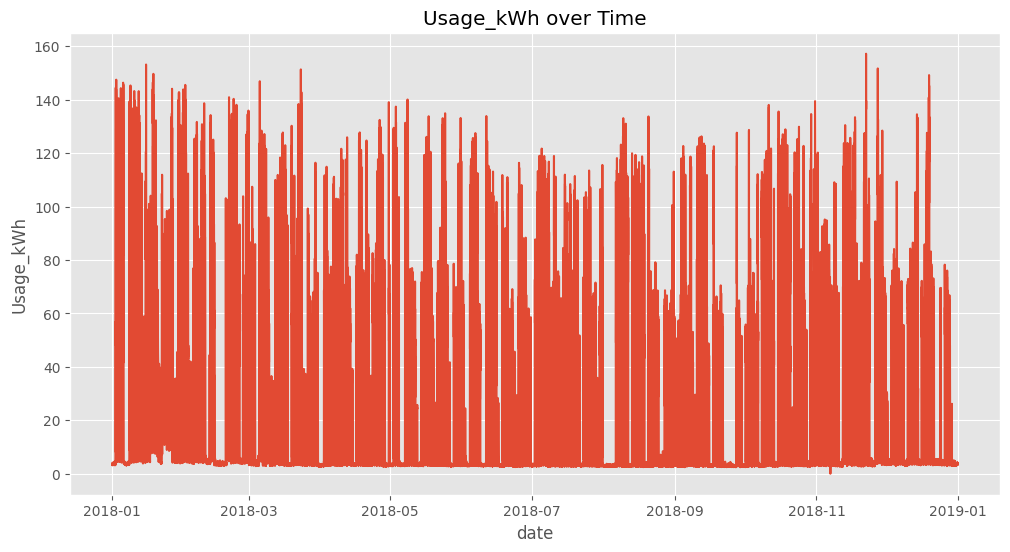

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='Usage_kWh', data=data)
plt.title('Usage_kWh over Time')
plt.show()

## 3.4 Correlation Analysis
Correlation matrix and heatmap

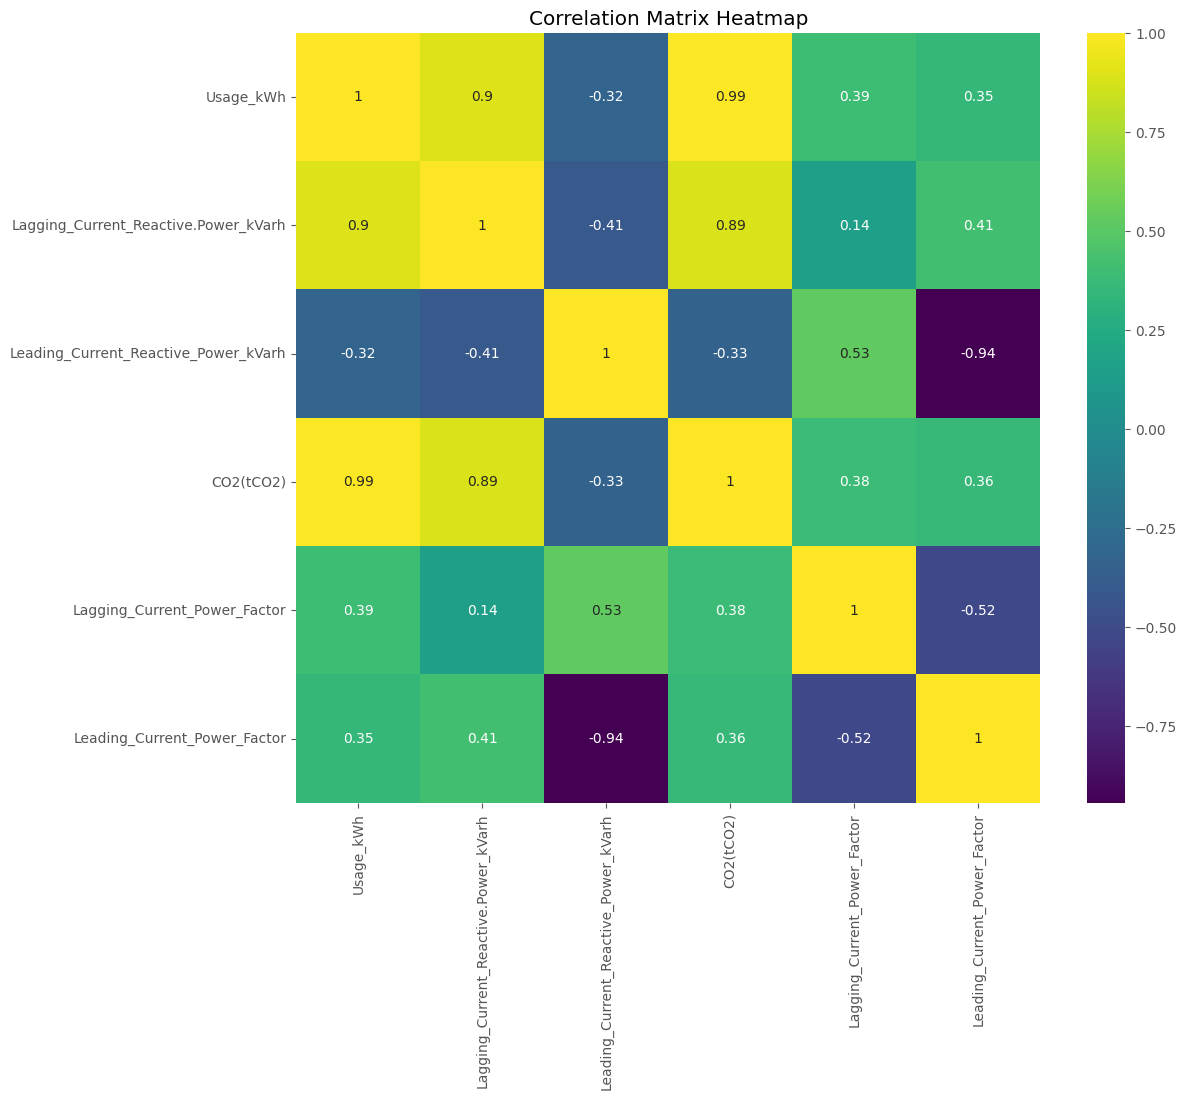

In [14]:
plt.figure(figsize=(12, 10))
corr_matrix = data[continuous_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix Heatmap')
plt.show()

## 3.5 Other

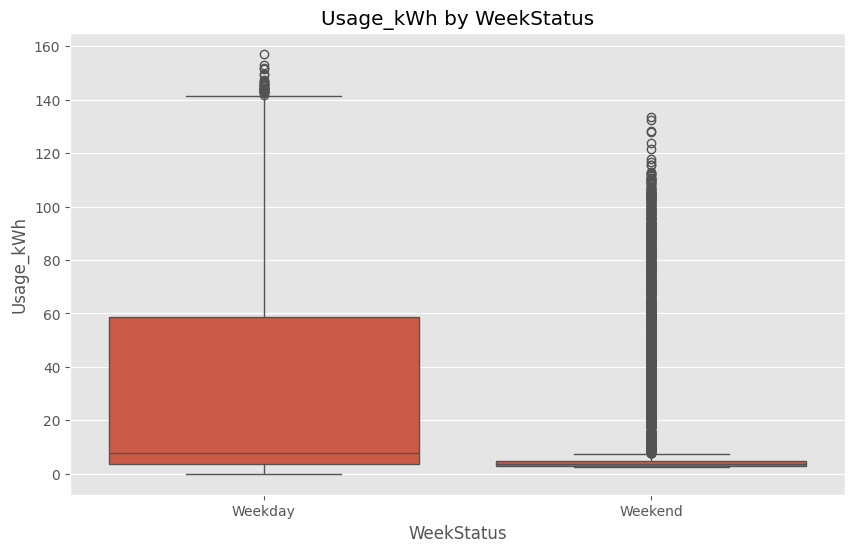

In [15]:
# Energy usage by WeekStatus
plt.figure(figsize=(10, 6))
sns.boxplot(x='WeekStatus', y='Usage_kWh', data=data)
plt.title('Usage_kWh by WeekStatus')
plt.show()

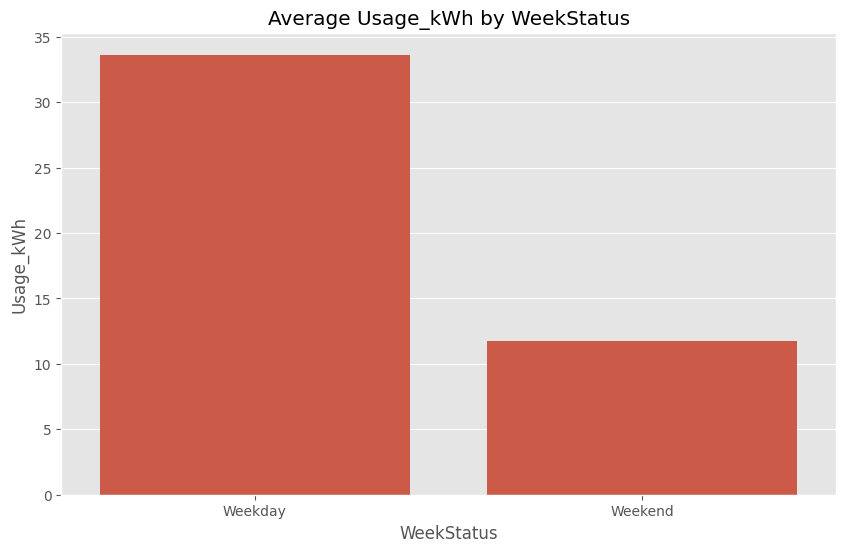

In [16]:
# Average energy usage by WeekStatus
plt.figure(figsize=(10, 6))
sns.barplot(x='WeekStatus', y='Usage_kWh', data=data, errorbar=None)
plt.title('Average Usage_kWh by WeekStatus')
plt.show()

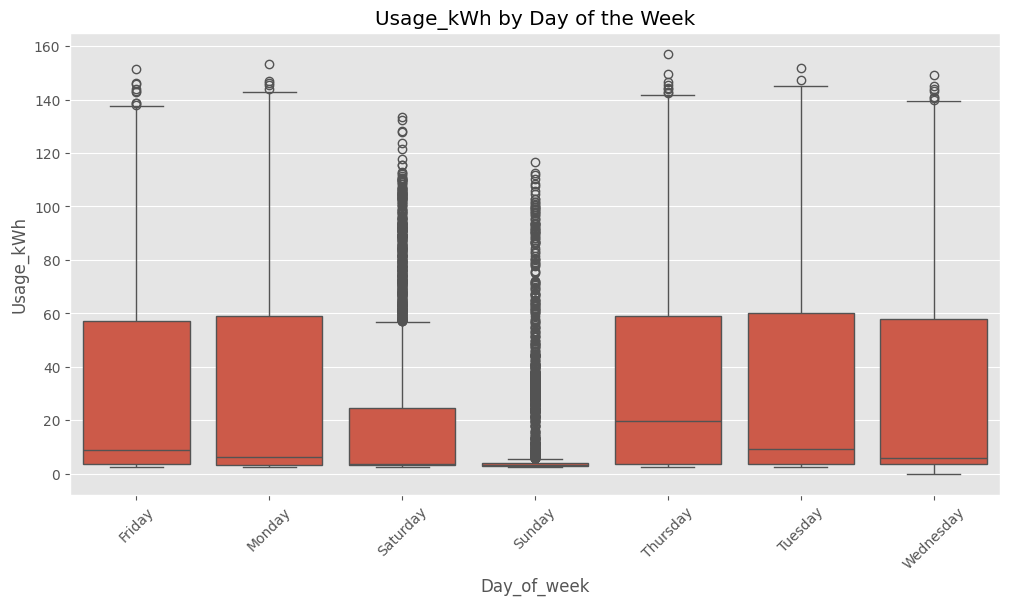

In [17]:
# Energy usage by Day_of_week
plt.figure(figsize=(12, 6))
sns.boxplot(x='Day_of_week', y='Usage_kWh', data=data)
plt.title('Usage_kWh by Day of the Week')
plt.xticks(rotation=45)
plt.show()

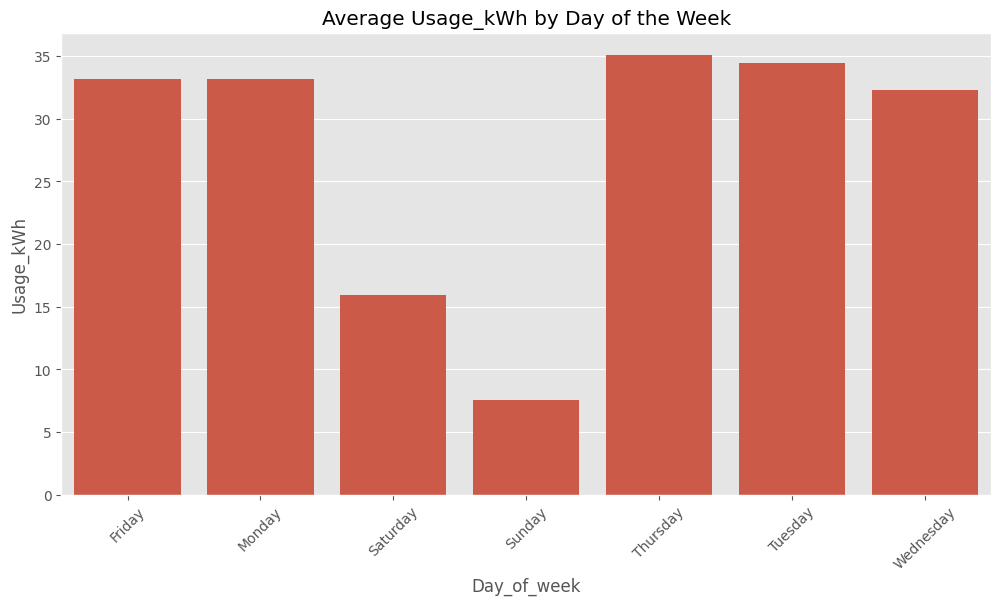

In [18]:
# Average energy usage by Day_of_week
plt.figure(figsize=(12, 6))
sns.barplot(x='Day_of_week', y='Usage_kWh', data=data, errorbar=None)
plt.title('Average Usage_kWh by Day of the Week')
plt.xticks(rotation=45)
plt.show()

# 4 Statistical Analysis

## 4.1 Hypothesis Testing: Energy Consumption between Weekdays and Weekends




> We will use an independent samples t-test to compare the mean energy consumption `(Usage_kWh)` between weekdays and weekends.

Hypotheses:
    
* Null Hypothesis (H0): There is no significant difference in energy consumption between weekdays and weekends.
* Alternative Hypothesis (H1): There is a significant difference in energy consumption between weekdays and weekends.






In [19]:
weekdays = data[data['WeekStatus'] == 'Weekday']['Usage_kWh']
weekends = data[data['WeekStatus'] == 'Weekend']['Usage_kWh']

In [20]:
# Perform independent samples t-test
t_stat, p_value = ttest_ind(weekdays, weekends, equal_var=False)  # Welch's t-test

In [21]:
print(f'T-statistic: {t_stat:.4f}')
print(f'P-value: {p_value:.4f}')

T-statistic: 72.7699
P-value: 0.0000


In [22]:
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in energy consumption between weekdays and weekends.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in energy consumption between weekdays and weekends.")

Reject the null hypothesis: There is a significant difference in energy consumption between weekdays and weekends.


## 4.2 Analyze if CO2 Levels Significantly Affect Energy Consumption

> We'll use a linear regression model to see if `CO2(tCO2)` significantly affects `Usage_kWh`.

Hypotheses:
    
* Null Hypothesis (H0): CO2 levels do not significantly affect energy consumption.
* Alternative Hypothesis (H1): CO2 levels significantly affect energy consumption.

In [23]:
# Prepare the data for regression
X = data['CO2(tCO2)']
y = data['Usage_kWh']

# Add a constant to the predictor variable matrix (required for statsmodels regression)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Usage_kWh   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 1.456e+06
Date:                Tue, 30 Jul 2024   Prob (F-statistic):               0.00
Time:                        08:47:17   Log-Likelihood:            -1.0699e+05
No. Observations:               35040   AIC:                         2.140e+05
Df Residuals:                   35038   BIC:                         2.140e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8051      0.034    113.086      0.0

In [24]:
# Interpretation based on p-value
if model.pvalues.iloc[1] < 0.05:
    print("Reject the null hypothesis: CO2 levels significantly affect energy consumption.")
else:
    print("Fail to reject the null hypothesis: CO2 levels do not significantly affect energy consumption.")

Reject the null hypothesis: CO2 levels significantly affect energy consumption.


# 5 Regression Modeling

In [27]:
# Define features and target
X = data.drop(columns=['Usage_kWh', 'date'])  # Drop the target and non-numeric feature
y = data['Usage_kWh']

In [28]:
# Preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['float64', 'int64']).columns),
        ('cat', OneHotEncoder(drop='first'), X.select_dtypes(include=['category']).columns)
    ])

In [29]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Define models
models = {
    'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', LinearRegression())]),
    'Decision Tree': Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', DecisionTreeRegressor())]),
    'Random Forest': Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', RandomForestRegressor())]),
    'Gradient Boosting': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', GradientBoostingRegressor())]),
    'SVR': Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', SVR())])
}

In [48]:
list(models.items())[0]

('Linear Regression',
 Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   Index(['Lagging_Current_Reactive.Power_kVarh',
        'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
        'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'],
       dtype='object')),
                                                  ('cat',
                                                   OneHotEncoder(drop='first'),
                                                   Index(['WeekStatus', 'Day_of_week', 'Load_Type'], dtype='object'))])),
                 ('regressor', LinearRegression())]))

Model: Linear Regression
Mean Absolute Error (MAE): 2.533774387242965
Mean Squared Error (MSE): 17.84227908276889
Root Mean Squared Error (RMSE): 4.224012202014678
R^2 Score: 0.9843037490428131


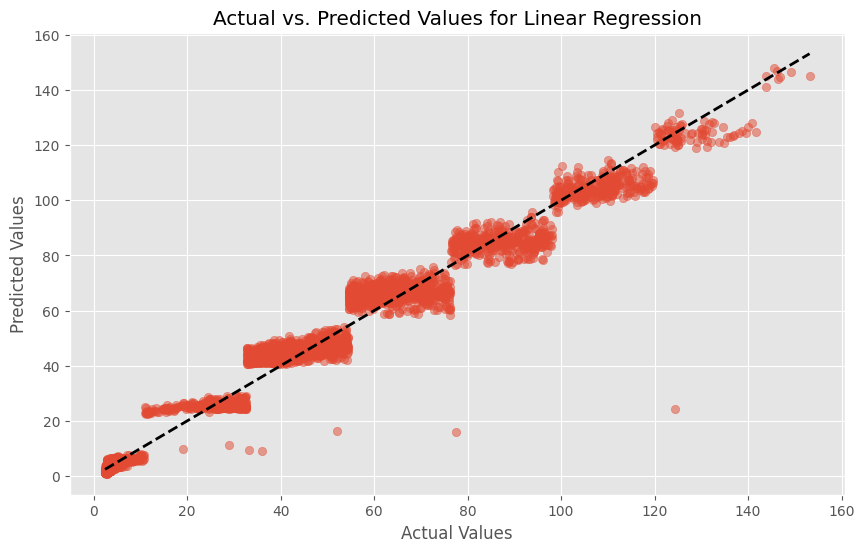

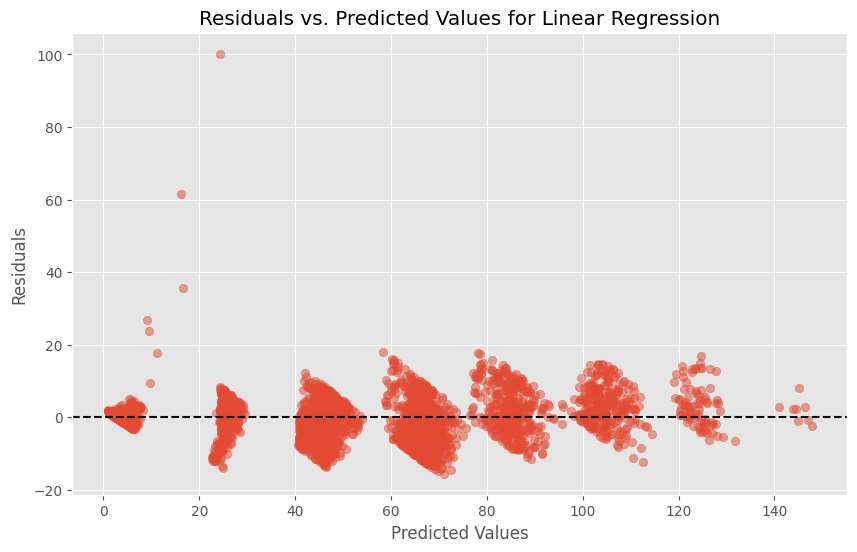



Model: Decision Tree
Mean Absolute Error (MAE): 0.5299229452054794
Mean Squared Error (MSE): 2.2905654965753426
Root Mean Squared Error (RMSE): 1.5134614288363422
R^2 Score: 0.9979849384318373


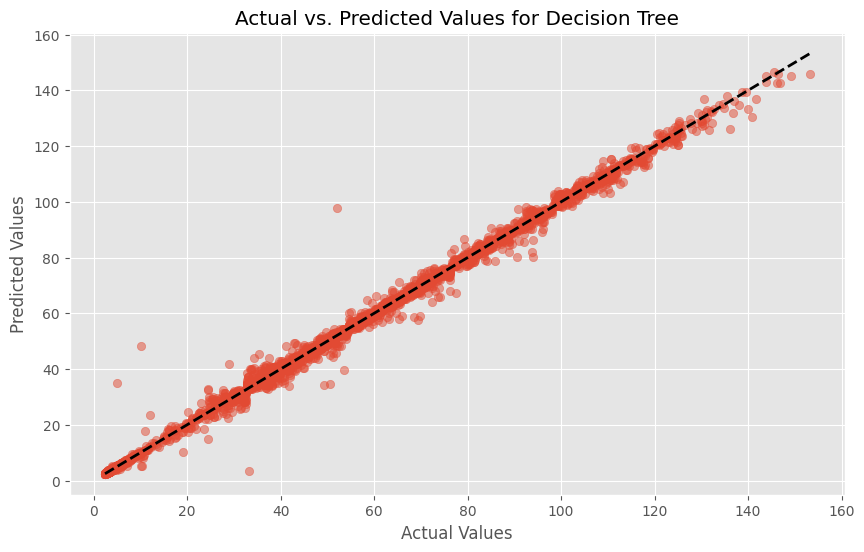

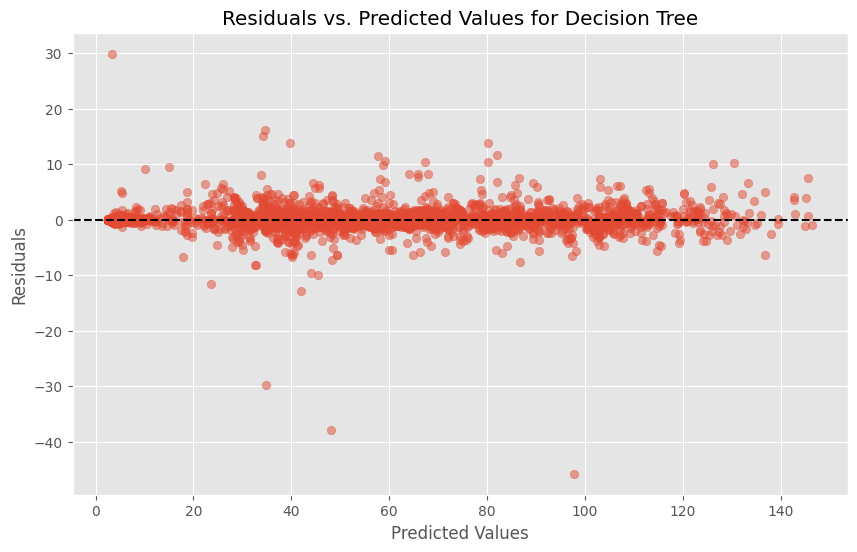



Model: Random Forest
Mean Absolute Error (MAE): 0.3324908390410953
Mean Squared Error (MSE): 1.1638438004337885
Root Mean Squared Error (RMSE): 1.0788159251854732
R^2 Score: 0.9989761406442623


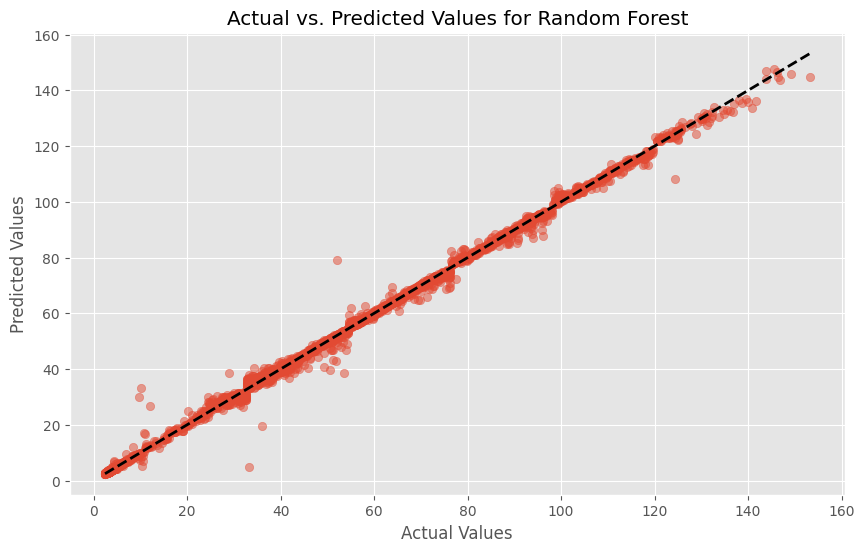

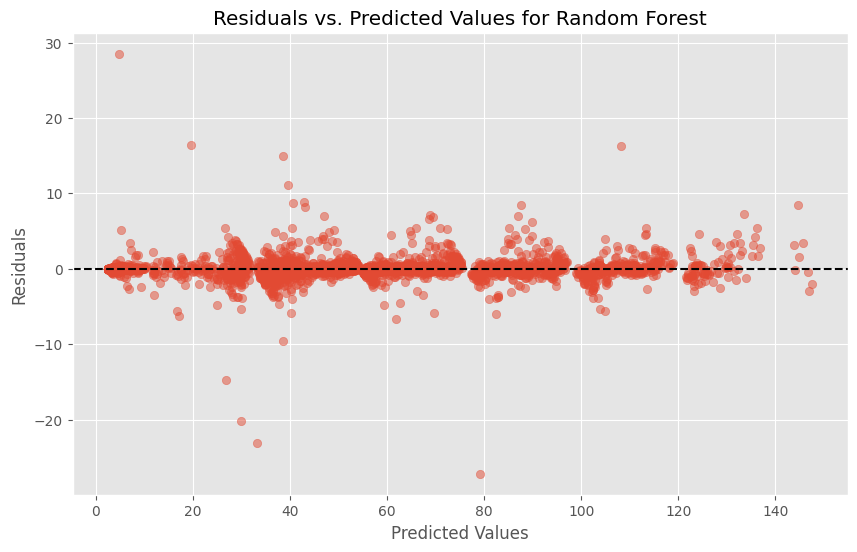



Model: Gradient Boosting
Mean Absolute Error (MAE): 1.7613206725536676
Mean Squared Error (MSE): 8.332347348077285
Root Mean Squared Error (RMSE): 2.8865805632404036
R^2 Score: 0.9926698481493781


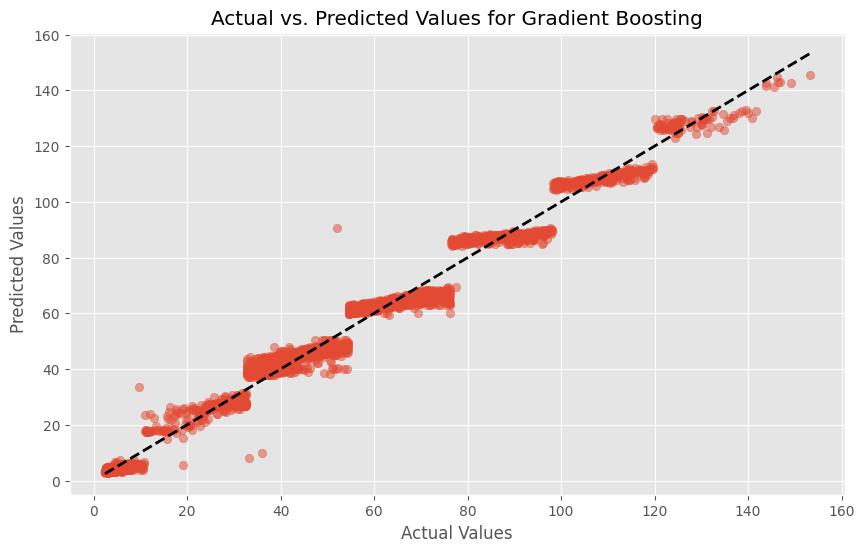

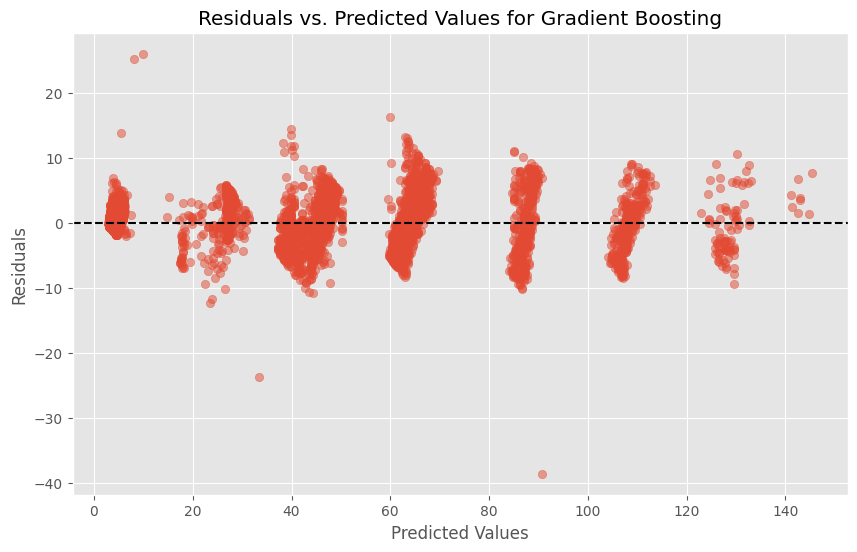



Model: SVR
Mean Absolute Error (MAE): 1.1352139900527065
Mean Squared Error (MSE): 6.467158609133334
Root Mean Squared Error (RMSE): 2.543060874051845
R^2 Score: 0.9943106962940109


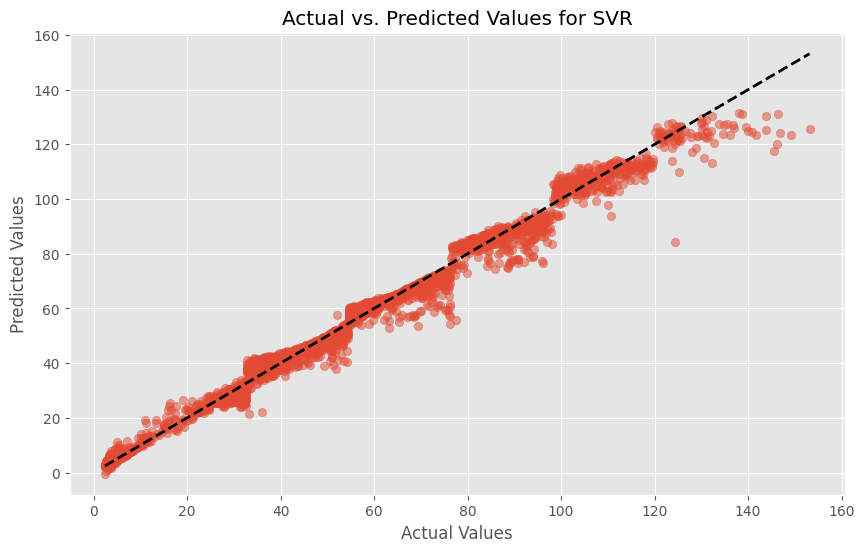

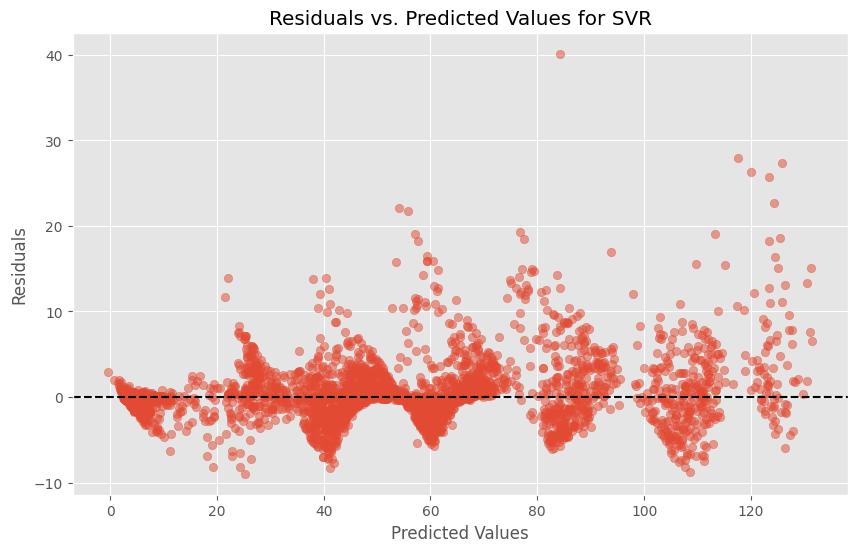

In [ ]:
results = []

# Train and evaluate models
for name, model in models.items():

    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R^2 Score:", r2)

    results.append({
        'Model': name,
        'Mean Absolute Error (MAE)': mae,
        'Mean Squared Error (MSE)': mse,
        'Root Mean Squared Error (RMSE)': rmse,
        'R^2 Score': r2
    })

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs. Predicted Values for {name}')
    plt.show()

    # Plot residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='k', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs. Predicted Values for {name}')
    plt.show()

    print("\n")

In [ ]:
results_df = pd.DataFrame(results)
results_df

,Model,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R^2 Score
0,Linear Regression,2.533774,17.842279,4.224012,0.984304
1,Decision Tree,0.529923,2.290565,1.513461,0.997985
2,Random Forest,0.332491,1.163844,1.078816,0.998976
3,Gradient Boosting,1.761321,8.332347,2.886581,0.992670
4,SVR,1.135214,6.467159,2.543061,0.994311
